On my honor as an Aggie, I have neither given nor received any unauthorized aid on this work - **(Type in your name here and run this cell)**

**Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Import the Data (.csv file)**

In [3]:
Vib = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data.csv')

# Exploratory Analysis

*The variable 'Vib' has all the data. Explore the data using the commands - head, info, describe, or any other commands you want to try out.*

In [4]:
Vib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22106 entries, 0 to 22105
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth      22106 non-null  float64
 1   RPM        11024 non-null  float64
 2   WOB        11038 non-null  float64
 3   MSE        10893 non-null  float64
 4   TOR        11005 non-null  float64
 5   DBMAX      10975 non-null  float64
 6   StickSlip  22106 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 1.2 MB


In [5]:
Vib.describe()

,Depth,RPM,WOB,MSE,TOR,DBMAX,StickSlip
count,22106.000000,11024.000000,11038.000000,1.089300e+04,11005.000000,10975.000000,22106.000000
mean,3662.450320,2.865876,65871.987679,1.659792e+08,10035.165684,7429.370047,0.121053
std,564.297415,0.405516,21553.119897,1.096654e+08,1397.324136,4582.600407,0.326196
min,2577.115000,0.250000,-105000.000000,1.301470e+06,3750.000000,0.000000,0.000000
25%,3202.249250,2.965490,50000.000000,1.252790e+08,9062.500000,4101.560000,0.000000
50%,3673.979000,2.997070,67500.000000,1.532450e+08,9843.750000,5273.440000,0.000000
75%,4150.863000,2.997070,80000.000000,1.799780e+08,10781.300000,10546.900000,0.000000
max,4561.817000,8.270180,315000.000000,2.045240e+09,30625.000000,75000.000000,1.000000


In [6]:
Vib.columns

Index(['Depth', 'RPM', 'WOB', 'MSE', 'TOR', 'DBMAX', 'StickSlip'], dtype='object')

In [7]:
Vib.head

<bound method NDFrame.head of           Depth      RPM      WOB           MSE      TOR     DBMAX  StickSlip
0      2577.115  1.00781  52500.0  1.978150e+09  7500.00  14648.40          1
1      2577.131      NaN      NaN           NaN      NaN       NaN          0
2      2577.202  1.00781  52500.0  3.009190e+08  7343.75  14062.50          0
3      2577.219      NaN      NaN           NaN      NaN       NaN          0
4      2577.320  1.00781  52500.0  1.348680e+08  7656.25  14062.50          0
...         ...      ...      ...           ...      ...       ...        ...
22101  4561.513      NaN      NaN           NaN      NaN       NaN          0
22102  4561.682  3.02865  12500.0  7.985540e+07  7812.50   4101.56          0
22103  4561.705      NaN      NaN           NaN      NaN       NaN          0
22104  4561.799  3.02865  17500.0  1.236480e+08  7968.75   4101.56          0
22105  4561.817  3.02865  15000.0  3.768830e+08  7656.25   4101.56          0

[22106 rows x 7 columns]>

*There is this cool command in seaborn library (imported as sns), which visually shows you the whole dataset if there are any missing values.*

*Try out this heatmap command on our dataset - sns.heatmap(Vib.isnull(),yticklabels=False,cbar=False,cmap='viridis')*

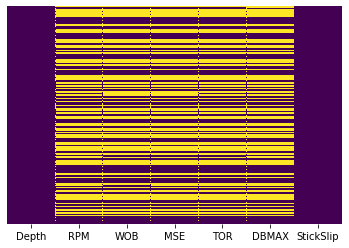

In [8]:
sns.heatmap(Vib.isnull(),yticklabels=False,cbar=False,cmap='viridis')

*There seems to be a lot of missing data points. But this is what we would expect from real-world data. So, let's get rid of all those rows with empty values*

In [9]:
Vibration = Vib.dropna()

*Now all our 'clean' data is in the variable 'Vibration'. Lets do the info, describe commands to see how many rows did we lose.*

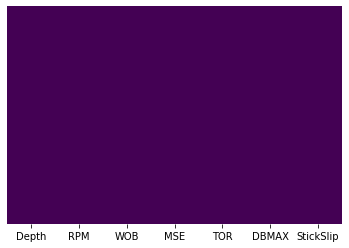

In [10]:
sns.heatmap(Vibration.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
Vibration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10647 entries, 0 to 22105
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth      10647 non-null  float64
 1   RPM        10647 non-null  float64
 2   WOB        10647 non-null  float64
 3   MSE        10647 non-null  float64
 4   TOR        10647 non-null  float64
 5   DBMAX      10647 non-null  float64
 6   StickSlip  10647 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 665.4 KB


*Try out the heatmap command again on 'Vibration' data now, to visually see the dataset for empty values.*

*Let's try a different plot now. I want to see WOB on X-axis and RPM on Y-axis, on a 'Scatter Plot'. here's the command - sns.scatterplot(x="column_name", y="column_name",data=Vibration)*

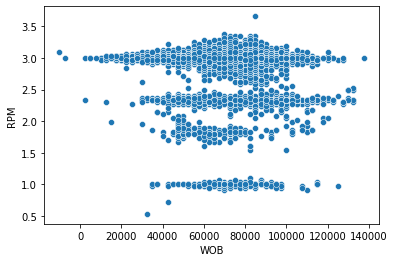

In [12]:
sns.scatterplot(x="WOB", y="RPM",data=Vibration)

*The above plot showed us distribution of WOB and RPM values; but was not very informational regarding dysfunctions.*

*So, let's add Stickslip data to the same plot. I want to be able to differentiate those data points where there was Stickslip. To the above command, there is a feature called 'hue' which we will assign it to 'Stickslip'.*

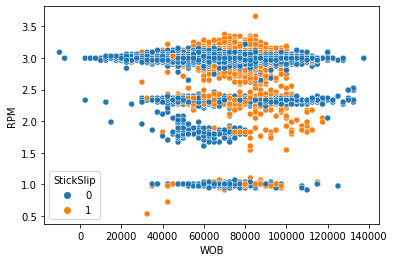

In [13]:
sns.scatterplot(x="WOB", y="RPM", hue="StickSlip",data=Vibration)

*There is one more useful plot called 'pairplot'. I promise, this is the last type of plot. Well, data analytics is all about showing off with your beautiful charts and plots!*

*Tryout sns.pairplot(Vibration). This plots all the variables in the data, one against another showing us correlation between features. The command might take a while to run.*

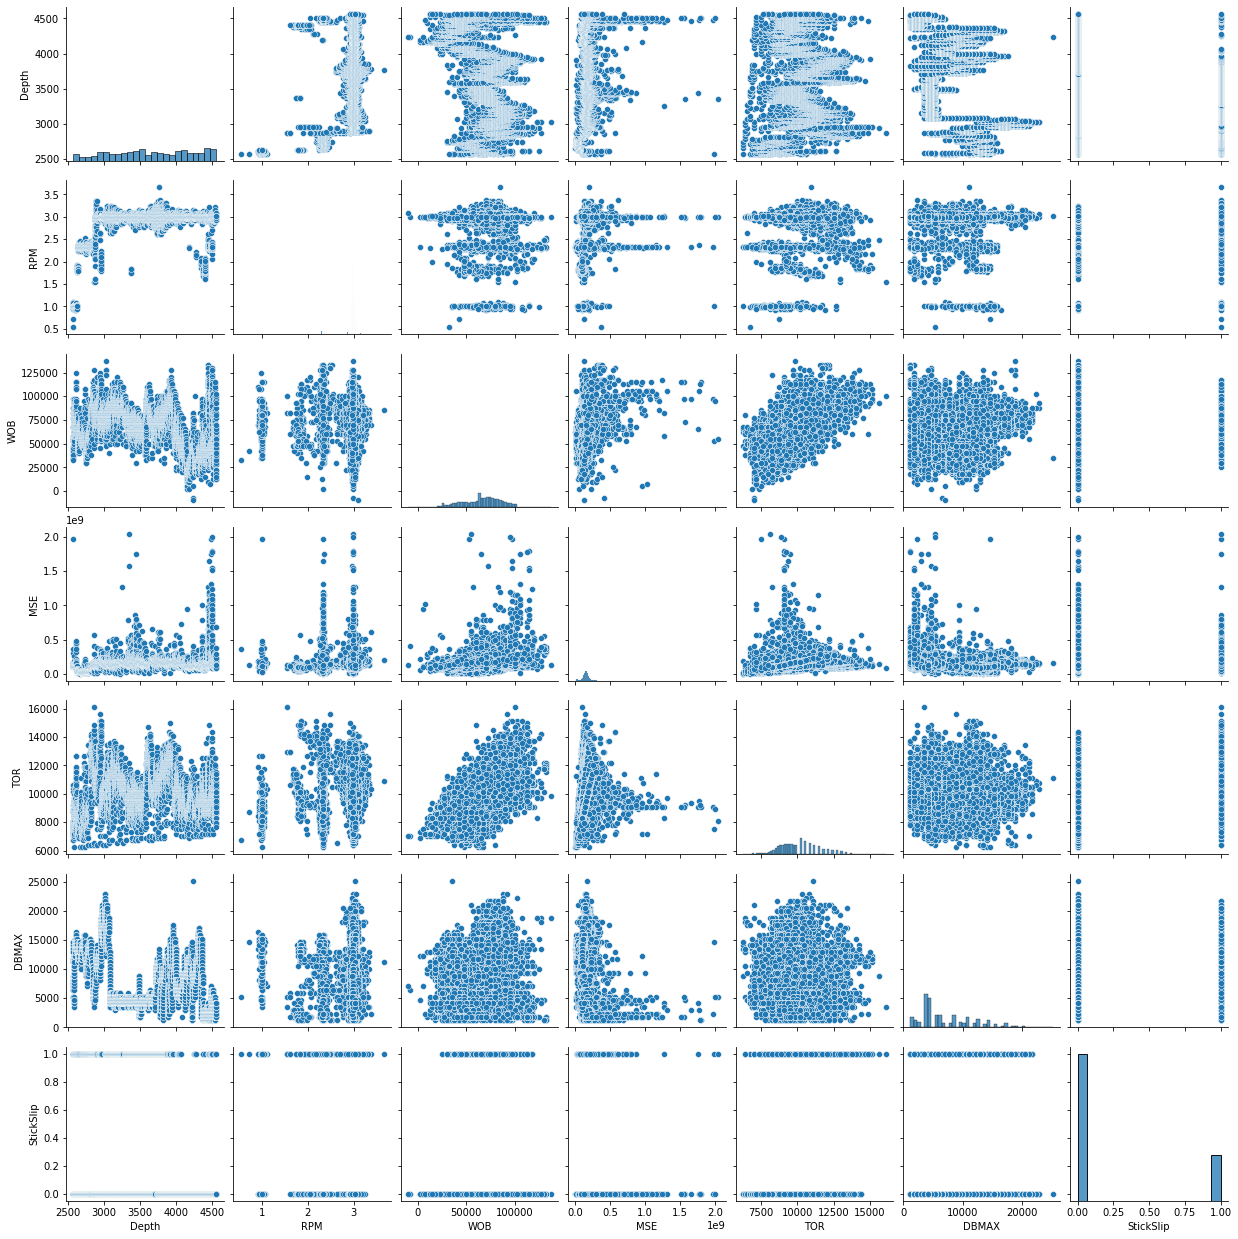

In [14]:
sns.pairplot(Vibration)

*Instead of looking at all variables, the drilling engineer brings his domain knowledge saying that Stickslip is most affected by Torque and Bending moment values. So separate only that data for the plot - Vibration[['DBMAX','TOR','StickSlip']].*

*And may be add some 'hue'*

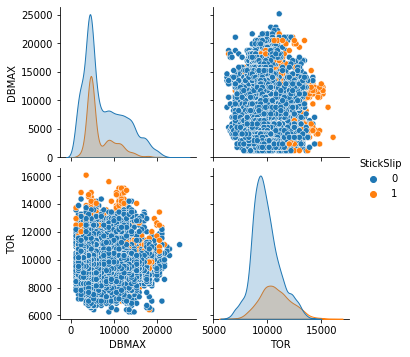

In [15]:
sns.pairplot(Vibration[['DBMAX','TOR','StickSlip']],hue='StickSlip')

# Implementing Model

*The objective is to predict Stickslip. Or in other words, classify Stickslip as 1 or 0. Use all the other columns as your features and Stickslip as output.*

**Define Inputs (X) and Outputs (y)**

In [16]:
X = Vibration[['Depth', 'RPM', 'WOB','MSE', 'TOR', 'DBMAX']]
y = Vibration[['StickSlip']]

**Split the data into Training and Testing**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)


**Import KNN Model**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
my_model = KNeighborsClassifier(n_neighbors=10)

**Fit the data (Train the data)**

In [19]:
my_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

**Make Predictions on Test data**

In [20]:
y_pred = my_model.predict(X_test)

**Print Classification Report**

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      2453
           1       0.36      0.03      0.05       742

    accuracy                           0.76      3195
   macro avg       0.57      0.51      0.46      3195
weighted avg       0.68      0.76      0.68      3195



*There are several techniques to further improve the model accuracy, either by getting more data points, more variables or simply by using a more complex model.*

Repeat the modeling using 


1.   Logistic Regression
2.   Random Forests
3.   Artificial Neural Networks




In [23]:
from sklearn.linear_model import LogisticRegression

my_model = LogisticRegression()

In [24]:
my_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = my_model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2453
           1       0.00      0.00      0.00       742

    accuracy                           0.77      3195
   macro avg       0.38      0.50      0.43      3195
weighted avg       0.59      0.77      0.67      3195



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I tried to do some of the other methods but I am not sure if i am doing this correctly 


In [28]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()

In [29]:
X = [[0, 0], [1, 1]]
>>> Y = [0, 1]
>>> clf = RandomForestClassifier(n_estimators=10)
>>> clf = clf.fit(X, Y)

In [30]:
my_model = RandomForestClassifier()
my_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred = my_model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2453
           1       0.80      0.64      0.71       742

    accuracy                           0.88      3195
   macro avg       0.85      0.80      0.82      3195
weighted avg       0.88      0.88      0.87      3195



In [34]:
>>> from sklearn.neural_network import MLPClassifier


In [35]:
my_model = MLPClassifier()
my_model.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [36]:
y_pred = my_model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2453
           1       0.23      1.00      0.38       742

    accuracy                           0.23      3195
   macro avg       0.62      0.50      0.19      3195
weighted avg       0.82      0.23      0.09      3195



**Congratulations on completing the machine learning project !**